In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
from sklearn.preprocessing import LabelEncoder,MinMaxScaler,StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier ,RandomForestClassifier ,GradientBoostingClassifier
from xgboost import XGBClassifier 
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.linear_model import Ridge,Lasso
from sklearn.metrics import roc_auc_score ,mean_squared_error,accuracy_score,classification_report,roc_curve,confusion_matrix
import warnings
warnings.filterwarnings('ignore')
from scipy.stats.mstats import winsorize
from sklearn.feature_selection import RFE
from sklearn.model_selection import train_test_split
pd.set_option('display.max_columns',None)
import six
import sys
sys.modules['sklearn.externals.six'] = six

In [3]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [4]:
# accessing to the folder where the file is stored
path = 'C:/Users/Lenovo/Desktop/train.csv'

# Load the dataframe
dataframe = pd.read_csv(path)

# Remove the Id column from the dataset
dataframe.drop('Id',axis=1,inplace=True)

print('Shape of the data is: ',dataframe.shape)

dataframe.head()

Shape of the data is:  (32950, 21)


,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,49,blue-collar,married,basic.9y,unknown,no,no,cellular,nov,wed,227,4,999,0,nonexistent,-0.1,93.200,-42.0,4.120,5195.8,no
1,37,entrepreneur,married,university.degree,no,no,no,telephone,nov,wed,202,2,999,1,failure,-0.1,93.200,-42.0,4.120,5195.8,no
2,78,retired,married,basic.4y,no,no,no,cellular,jul,mon,1148,1,999,0,nonexistent,-1.7,94.215,-40.3,0.870,4991.6,yes
3,36,admin.,married,university.degree,no,yes,no,telephone,may,mon,120,2,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,59,retired,divorced,university.degree,no,no,no,cellular,jun,tue,368,2,999,0,nonexistent,-2.9,92.963,-40.8,1.262,5076.2,no


In [5]:
# IDENTIFYING NUMERICAL FEATURES

numeric_data = dataframe.select_dtypes(include=np.number) # select_dtypes selects data with numeric features
numeric_col = numeric_data.columns                                                                # we will store the numeric features in a variable

print("Numeric Features:")
print(numeric_data.head())
print("===="*20)

Numeric Features:
   age  duration  campaign  pdays  previous  emp.var.rate  cons.price.idx  \
0   49       227         4    999         0          -0.1          93.200   
1   37       202         2    999         1          -0.1          93.200   
2   78      1148         1    999         0          -1.7          94.215   
3   36       120         2    999         0           1.1          93.994   
4   59       368         2    999         0          -2.9          92.963   

   cons.conf.idx  euribor3m  nr.employed  
0          -42.0      4.120       5195.8  
1          -42.0      4.120       5195.8  
2          -40.3      0.870       4991.6  
3          -36.4      4.857       5191.0  
4          -40.8      1.262       5076.2  


In [6]:
# IDENTIFYING CATEGORICAL FEATURES
categorical_data = dataframe.select_dtypes(exclude=np.number) # we will exclude data with numeric features
categorical_col = categorical_data.columns                                                                              # we will store the categorical features in a variable


print("Categorical Features:")
print(categorical_data.head())
print("===="*20)

Categorical Features:
            job   marital          education  default housing loan    contact  \
0   blue-collar   married           basic.9y  unknown      no   no   cellular   
1  entrepreneur   married  university.degree       no      no   no  telephone   
2       retired   married           basic.4y       no      no   no   cellular   
3        admin.   married  university.degree       no     yes   no  telephone   
4       retired  divorced  university.degree       no      no   no   cellular   

  month day_of_week     poutcome    y  
0   nov         wed  nonexistent   no  
1   nov         wed      failure   no  
2   jul         mon  nonexistent  yes  
3   may         mon  nonexistent   no  
4   jun         tue  nonexistent   no  


In [7]:
# CHECK THE DATATYPES OF ALL COLUMNS:
    
print(dataframe.dtypes)

age                 int64
job                object
marital            object
education          object
default            object
housing            object
loan               object
contact            object
month              object
day_of_week        object
duration            int64
campaign            int64
pdays               int64
previous            int64
poutcome           object
emp.var.rate      float64
cons.price.idx    float64
cons.conf.idx     float64
euribor3m         float64
nr.employed       float64
y                  object
dtype: object


In [8]:
# To identify the number of missing values in every feature

# Finding the total missing values and arranging them in ascending order
total = dataframe.isnull().sum()

# Converting the missing values in percentage
percent = (dataframe.isnull().sum()/dataframe.isnull().count())

dataframe.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,49,blue-collar,married,basic.9y,unknown,no,no,cellular,nov,wed,227,4,999,0,nonexistent,-0.1,93.200,-42.0,4.120,5195.8,no
1,37,entrepreneur,married,university.degree,no,no,no,telephone,nov,wed,202,2,999,1,failure,-0.1,93.200,-42.0,4.120,5195.8,no
2,78,retired,married,basic.4y,no,no,no,cellular,jul,mon,1148,1,999,0,nonexistent,-1.7,94.215,-40.3,0.870,4991.6,yes
3,36,admin.,married,university.degree,no,yes,no,telephone,may,mon,120,2,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,59,retired,divorced,university.degree,no,no,no,cellular,jun,tue,368,2,999,0,nonexistent,-2.9,92.963,-40.8,1.262,5076.2,no


In [9]:
# dropping features having missing values more than 60%
dataframe = dataframe.drop((percent[percent > 0.6]).index,axis= 1)

# checking null values
print(dataframe.isnull().sum())

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64


In [10]:
# imputing missing values with mean

for column in numeric_col:
    mean = dataframe[column].mean()
    dataframe[column].fillna(mean,inplace = True)
    
#   imputing with median
# for column in numeric_col:
#     mean = dataframe[column].median()
#     dataframe[column].fillna(mean,inpalce = True)

In [11]:
# we are finding the percentage of each class in the feature 'y'
class_values = (dataframe['y'].value_counts()/dataframe['y'].value_counts().sum())*100
print(class_values)

no     88.734446
yes    11.265554
Name: y, dtype: float64


In [12]:
cols = list(dataframe) # A List of all features

outliers = pd.DataFrame(columns=['Feature','Number of Outliers']) # Creating a new dataframe to

for column in numeric_col: # Iterating thorough each feature            
            # first quartile (Q1)
        q1 = dataframe[column].quantile(0.25) 
            
            # third quartile (Q3)
        q3 = dataframe[column].quantile(0.75)
            
            # IQR
        iqr = q3 - q1
            # 
        fence_low = q1 - (1.5*iqr)
        
        fence_high = q3 + (1.5*iqr)
            # finding the number of outliers using 'and(|) condition. 
        total_outlier = dataframe[(dataframe[column] < fence_low) | (dataframe[column] > fence_high)].shape[0]
        
        outliers = outliers.append({'Feature':column,'Number of Outliers':total_outlier},ignore_index=True)
outliers

,Feature,Number of Outliers
0,age,368
1,duration,2366
2,campaign,1916
3,pdays,1226
4,previous,4534
5,emp.var.rate,0
6,cons.price.idx,0
7,cons.conf.idx,359
8,euribor3m,0
9,nr.employed,0


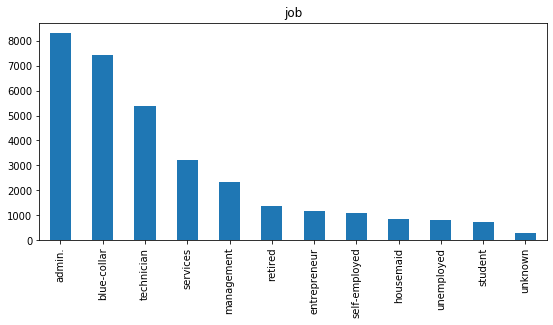

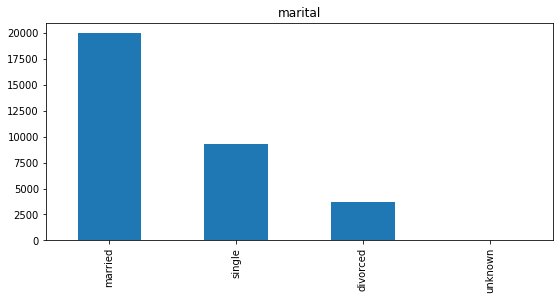

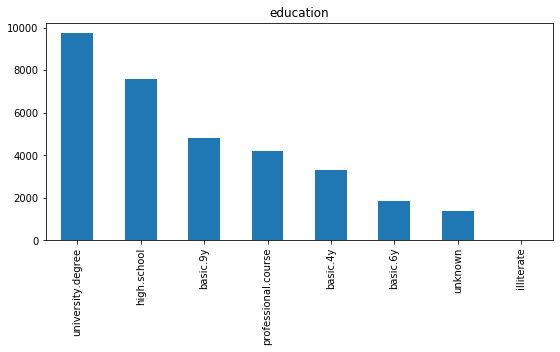

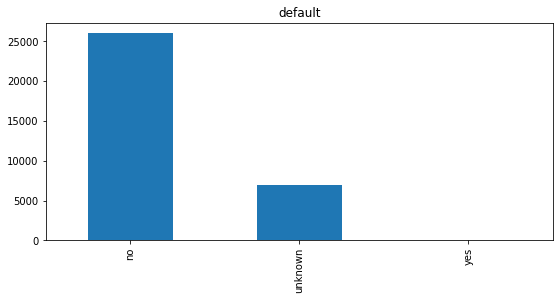

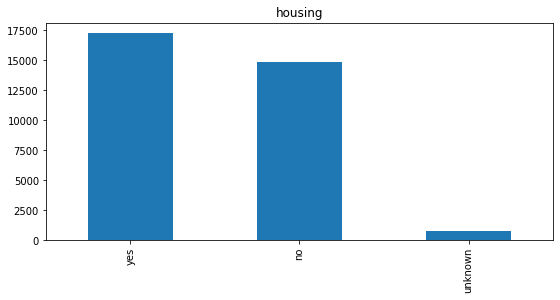

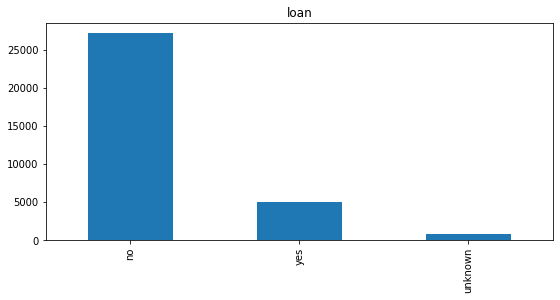

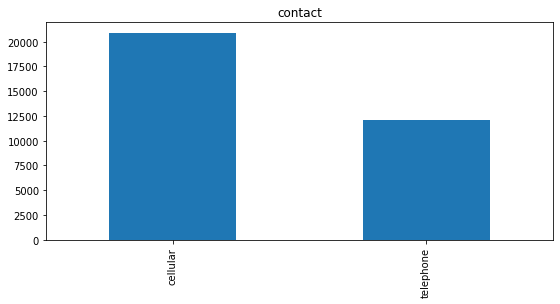

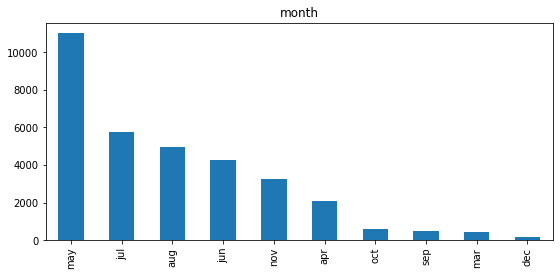

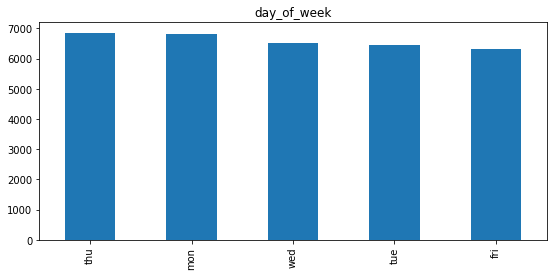

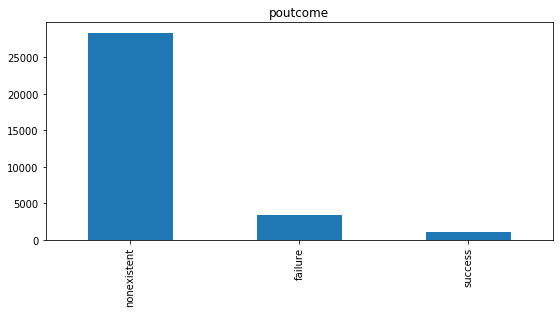

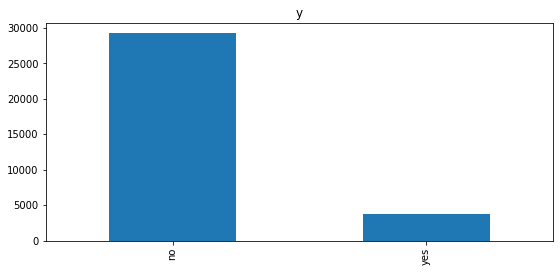

In [13]:
# Selecting the categorical columns
categorical_col = dataframe.select_dtypes(include=['object']).columns

# Plotting a bar chart for each of the cateorical variable
for column in categorical_col:
    plt.figure(figsize=(20,4))
    plt.subplot(121)
    dataframe[column].value_counts().plot(kind='bar')
    plt.title(column)

In [14]:
# Impute mising values of categorical data with mode
for column in categorical_col:
    mode = dataframe[column].mode()[0]
    dataframe[column] = dataframe[column].replace('unknown',mode)

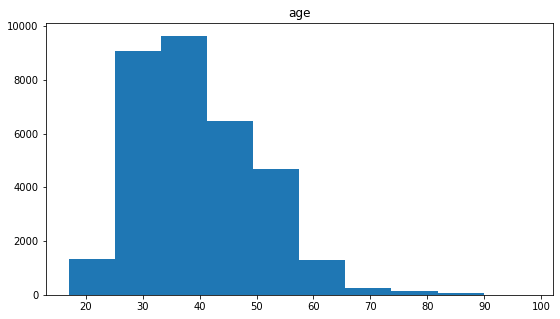

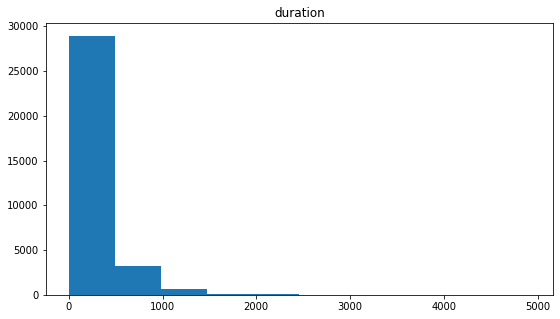

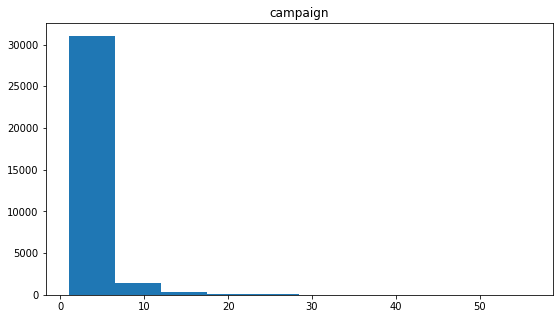

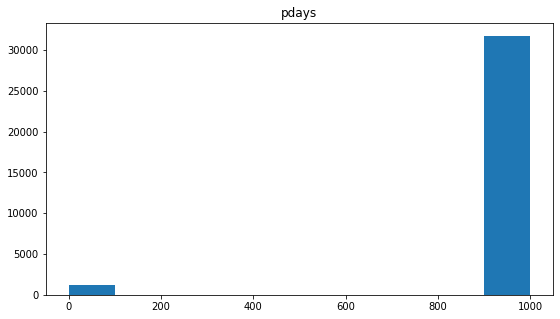

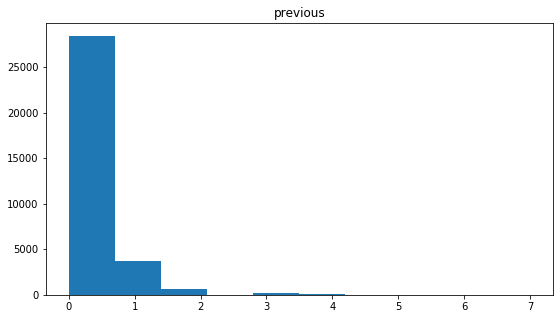

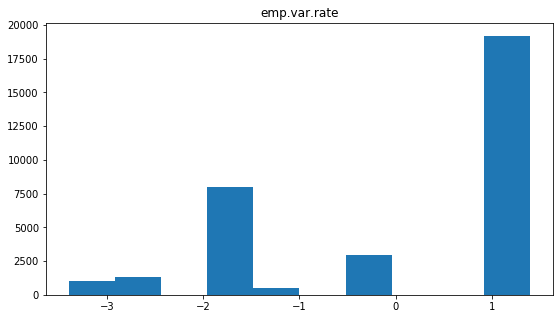

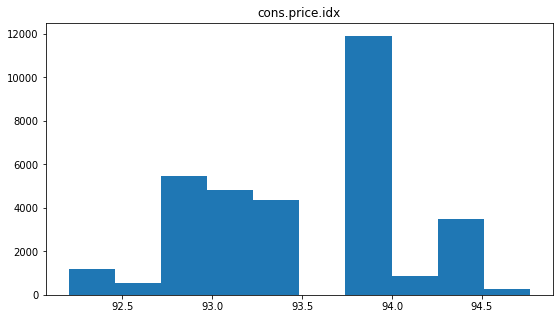

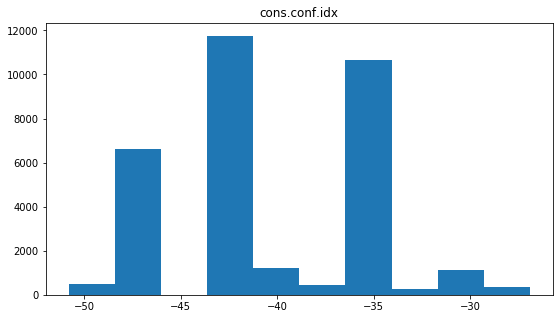

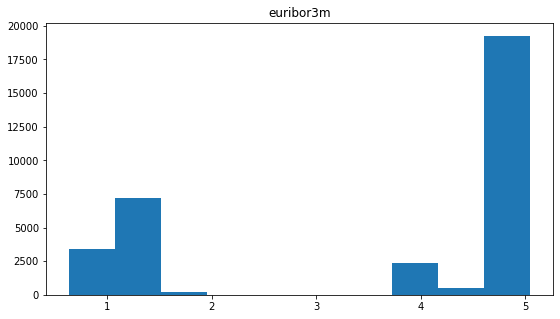

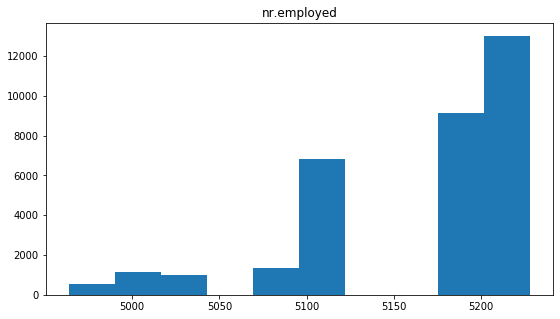

In [15]:
for column in numeric_col:
    plt.figure(figsize=(20,5))
    plt.subplot(121)
    plt.hist(dataframe[column])
    plt.title(column)

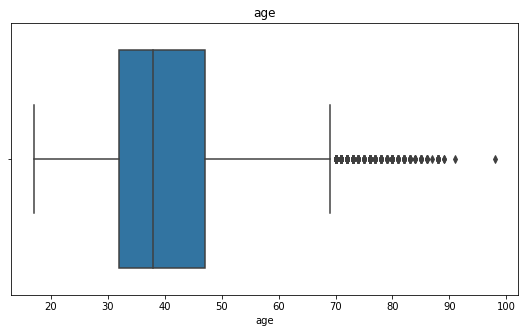

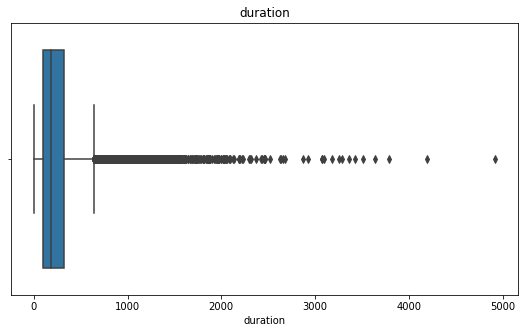

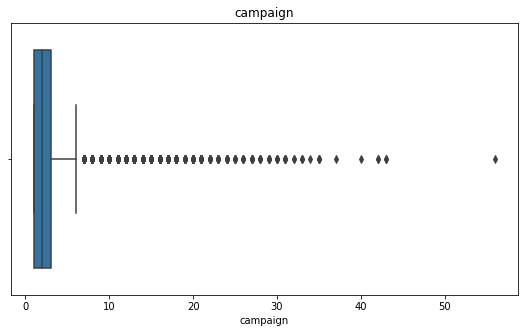

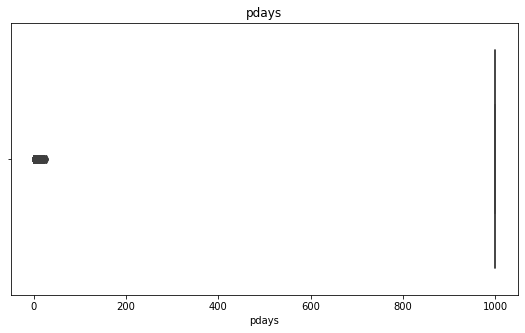

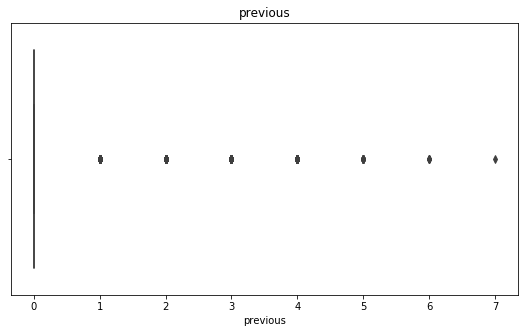

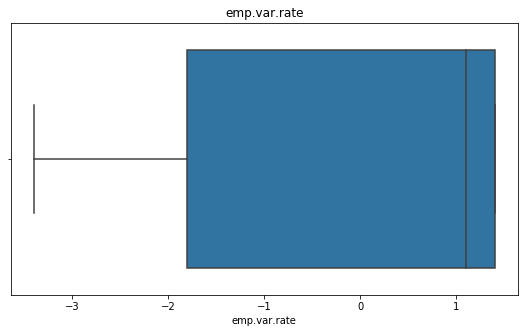

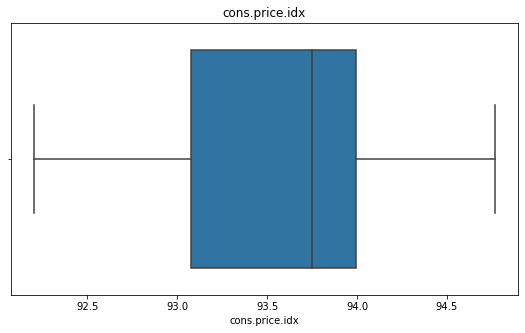

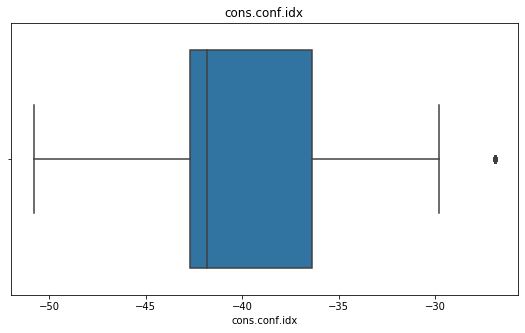

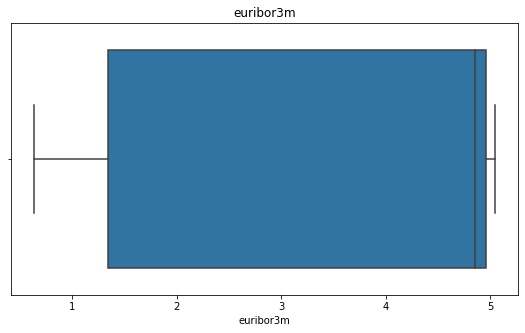

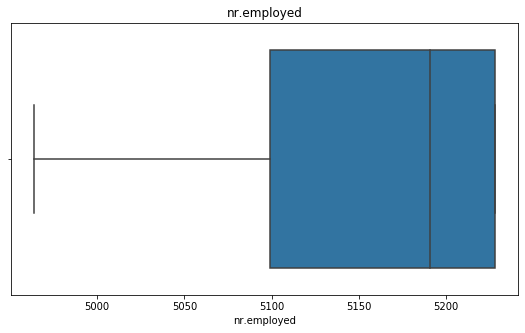

In [16]:

for column in numeric_col:
    plt.figure(figsize=(20,5))
    plt.subplot(122)
    sns.boxplot(dataframe[column])
    plt.title(column)

In [17]:

dataframe.drop(['pdays','previous'],1,inplace=True)

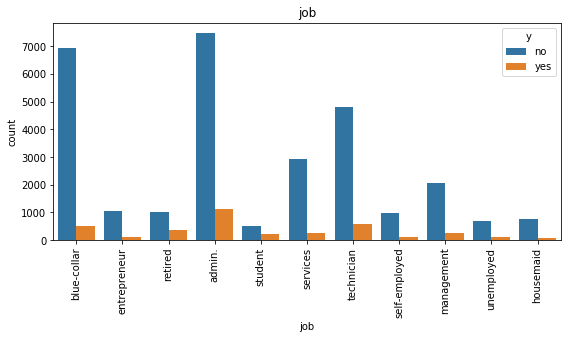

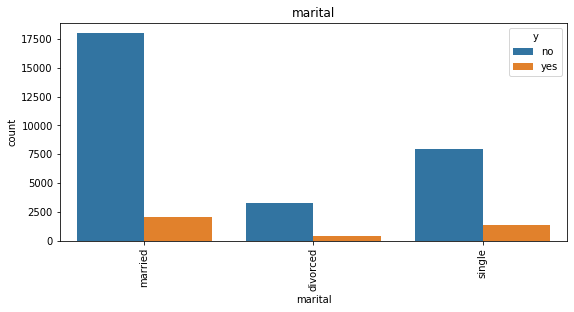

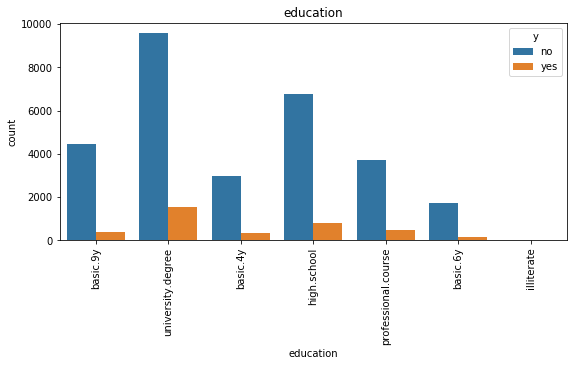

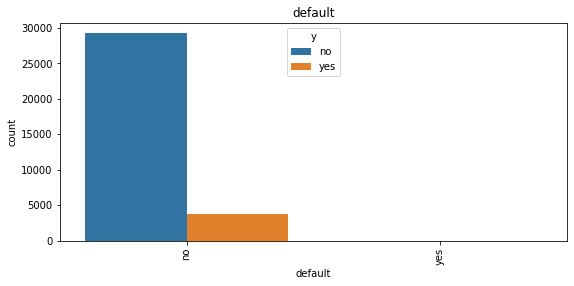

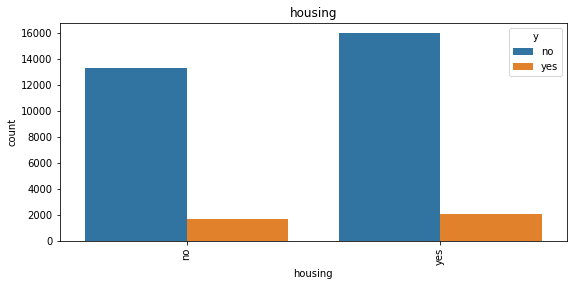

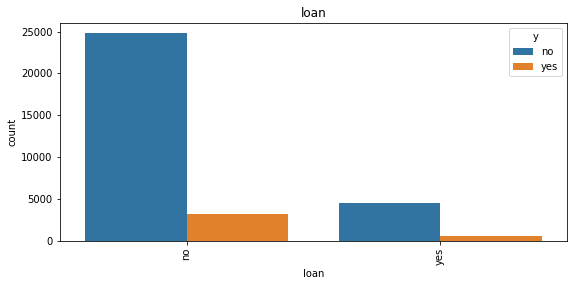

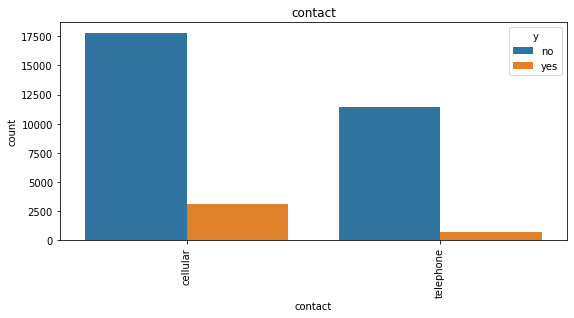

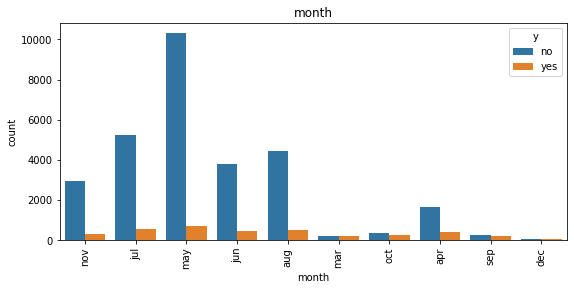

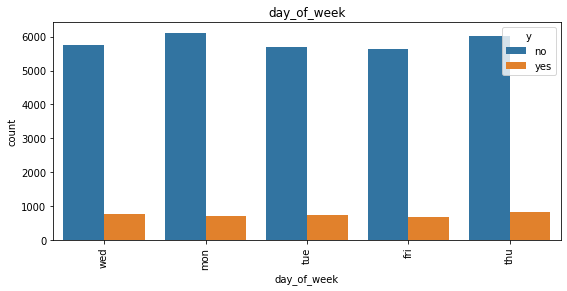

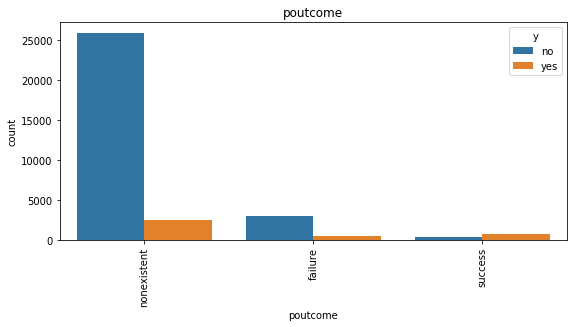

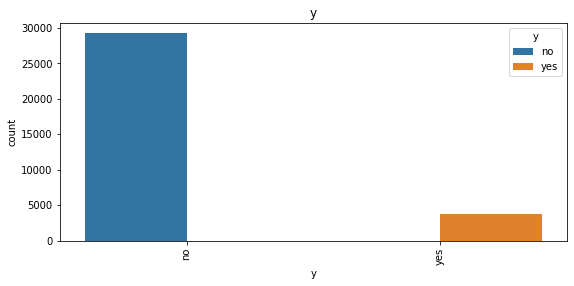

In [18]:
for column in categorical_col:
    plt.figure(figsize=(20,4))
    plt.subplot(121)
    sns.countplot(x=dataframe[column],hue=dataframe['y'],data=dataframe)
    plt.title(column)    
    plt.xticks(rotation=90)

Observations:
The common traits seen for customers who have subscribed for the term deposit are :
Customers having administrative jobs form the majority amongst those who have subscirbed to the term deposit with technicians being the second majority.
They are married
They hold a university degree
They do not hold a credit in default
Housing loan doesn't seem a priority to check for since an equal number of customers who have and have not subscribed to it seem to have subscribed to the term deposit.
Cell-phones should be the preferred mode of contact for contacting customers.
Treating outliers in the continuous columns
Outliers can be treated in a variety of ways. It depends on the skewness of the feature.
To reduce right skewness, we use roots or logarithms or reciprocals (roots are weakest). This is the most common problem in practice.
To reduce left skewness, we take squares or cubes or higher powers.
But in our data, some of the features have negative values and also the value 0. In such cases, square root transform or logarithmic transformation cannot be used since we cannot take square root of negative values and logarithm of zero is not defined.
Hence for this data we use a method called Winsorization. In this method we define a confidence interval of let's say 90% and then replace all the outliers below the 5th percentile with the value at 5th percentile and all the values above 95th percentile with the value at the 95th percentile. It is pretty useful when there are negative values and zeros in the features which cannot be treated with log transforms or square roots. Do read up on it more here

In [19]:
numeric_col = dataframe.select_dtypes(include=np.number).columns

for col in numeric_col:    
    dataframe[col] = winsorize(dataframe[col], limits=[0.05, 0.1],inclusive=(True, True))

# Now run the code snippet to check outliers again

In [20]:
# Initializing lable encoder
le = LabelEncoder()

# Initializing Label Encoder
le = LabelEncoder()

# Iterating through each of the categorical columns and label encoding them
for feature in categorical_col:
    try:
        dataframe[feature] = le.fit_transform(dataframe[feature])
    except:
        print('Error encoding '+feature)

In [21]:
# Predictors
X = dataframe.iloc[:,:-1]

# Target
y = dataframe.iloc[:,-1]

# Dividing the data into train and test subsets
x_train,x_val,y_train,y_val = train_test_split(X,y,test_size=0.2,random_state=42)

In [22]:
# run Logistic Regression model
model = LogisticRegression()
# fitting the model
model.fit(x_train, y_train)
# predicting the values
y_scores = model.predict(x_val)

Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.97      0.94      5798
           1       0.59      0.34      0.43       792

    accuracy                           0.89      6590
   macro avg       0.75      0.65      0.68      6590
weighted avg       0.88      0.89      0.88      6590

ROC_AUC_SCORE is 0.6522342256647189


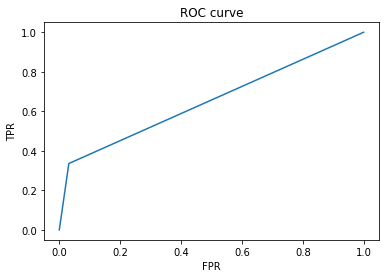

In [23]:
# getting the auc roc curve
auc = roc_auc_score(y_val, y_scores)
print('Classification Report:')
print(classification_report(y_val,y_scores))
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_val, y_scores)
print('ROC_AUC_SCORE is',roc_auc_score(y_val, y_scores))
    
#fpr, tpr, _ = roc_curve(y_test, predictions[:,1])
    
plt.plot(false_positive_rate, true_positive_rate)
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC curve')
plt.show()

Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.94      0.93      5798
           1       0.52      0.52      0.52       792

    accuracy                           0.89      6590
   macro avg       0.73      0.73      0.73      6590
weighted avg       0.89      0.89      0.89      6590

ROC_AUC_SCORE is 0.7283935857366352


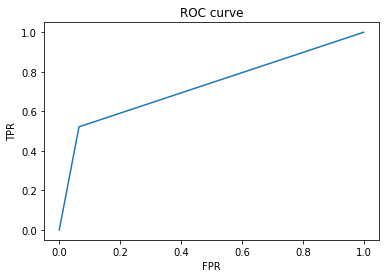

In [24]:
# Run Decision Tree Classifier
model = DecisionTreeClassifier()

model.fit(x_train, y_train)
y_scores = model.predict(x_val)
auc = roc_auc_score(y_val, y_scores)
print('Classification Report:')
print(classification_report(y_val,y_scores))
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_val, y_scores)
print('ROC_AUC_SCORE is',roc_auc_score(y_val, y_scores))
    
#fpr, tpr, _ = roc_curve(y_test, predictions[:,1])
    
plt.plot(false_positive_rate, true_positive_rate)
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC curve')
plt.show()

Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.97      0.94      5798
           1       0.59      0.34      0.43       792

    accuracy                           0.89      6590
   macro avg       0.75      0.65      0.68      6590
weighted avg       0.88      0.89      0.88      6590

ROC_AUC_SCORE is 0.6522342256647189


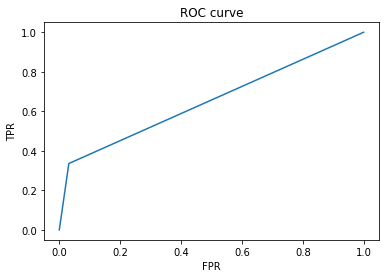

In [25]:
# Run Logistic Regression Classifier
model = LogisticRegression()

model.fit(x_train, y_train)
y_scores = model.predict(x_val)
auc = roc_auc_score(y_val, y_scores)
print('Classification Report:')
print(classification_report(y_val,y_scores))
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_val, y_scores)
print('ROC_AUC_SCORE is',roc_auc_score(y_val, y_scores))
    
#fpr, tpr, _ = roc_curve(y_test, predictions[:,1])
    
plt.plot(false_positive_rate, true_positive_rate)
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC curve')
plt.show()

Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.96      0.94      5798
           1       0.62      0.46      0.53       792

    accuracy                           0.90      6590
   macro avg       0.77      0.71      0.74      6590
weighted avg       0.89      0.90      0.89      6590

ROC_AUC_SCORE is 0.7126612799258538


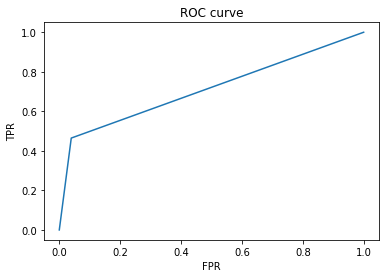

In [26]:
# run Random Forrest Classifier
model = RandomForestClassifier()

model.fit(x_train, y_train)
y_scores = model.predict(x_val)
auc = roc_auc_score(y_val, y_scores)
print('Classification Report:')
print(classification_report(y_val,y_scores))
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_val, y_scores)
print('ROC_AUC_SCORE is',roc_auc_score(y_val, y_scores))
    
#fpr, tpr, _ = roc_curve(y_test, predictions[:,1])
    
plt.plot(false_positive_rate, true_positive_rate)
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC curve')
plt.show()

Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.96      0.95      5798
           1       0.62      0.51      0.56       792

    accuracy                           0.90      6590
   macro avg       0.78      0.73      0.75      6590
weighted avg       0.90      0.90      0.90      6590

ROC_AUC_SCORE is 0.7346400796512903


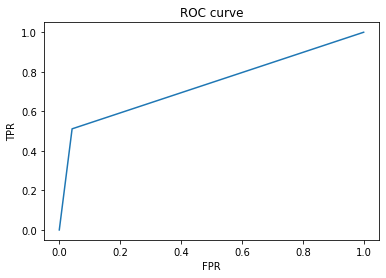

In [27]:
# Run XGBoost model
model = XGBClassifier()

model.fit(x_train, y_train)
y_scores = model.predict(x_val)
auc = roc_auc_score(y_val, y_scores)
print('Classification Report:')
print(classification_report(y_val,y_scores))
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_val, y_scores)
print('ROC_AUC_SCORE is',roc_auc_score(y_val, y_scores))
    
#fpr, tpr, _ = roc_curve(y_test, predictions[:,1])
    
plt.plot(false_positive_rate, true_positive_rate)
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC curve')
plt.show()

Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.97      0.95      5798
           1       0.65      0.44      0.52       792

    accuracy                           0.90      6590
   macro avg       0.79      0.70      0.73      6590
weighted avg       0.89      0.90      0.90      6590

ROC_AUC_SCORE is 0.7021356197365166


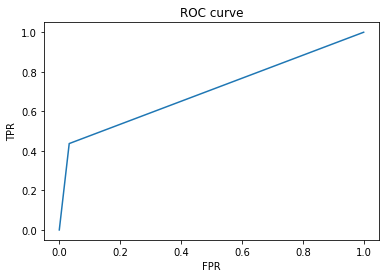

In [28]:
# Run Gradient Boosting model
model = GradientBoostingClassifier()

model.fit(x_train, y_train)
y_scores = model.predict(x_val)
auc = roc_auc_score(y_val, y_scores)
print('Classification Report:')
print(classification_report(y_val,y_scores))
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_val, y_scores)
print('ROC_AUC_SCORE is',roc_auc_score(y_val, y_scores))
    
#fpr, tpr, _ = roc_curve(y_test, predictions[:,1])
    
plt.plot(false_positive_rate, true_positive_rate)
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC curve')
plt.show()

In [29]:
# Selecting 8 number of features
#   selecting models
models = LogisticRegression()
#   using  rfe and selecting 8 features
rfe = RFE(models,8)
#   fitting the model
rfe = rfe.fit(X,y)
#   ranking features
feature_ranking = pd.Series(rfe.ranking_, index=X.columns)
plt.show()
print('Features  to be selected for Logistic Regression model are:')
print(feature_ranking[feature_ranking.values==1].index.tolist())
print('===='*30)

Features  to be selected for Logistic Regression model are:
['marital', 'contact', 'day_of_week', 'campaign', 'poutcome', 'emp.var.rate', 'cons.conf.idx', 'euribor3m']


In [30]:
# Selecting 8 number of features
# Random Forrest classifier model
models = RandomForestClassifier()
#   using  rfe and selecting 8 features
rfe = RFE(models,8)
#   fitting the model
rfe = rfe.fit(X,y)
#   ranking features
feature_ranking = pd.Series(rfe.ranking_, index=X.columns)
plt.show()
print('Features  to be selected for Random Forrest Classifier are:')
print(feature_ranking[feature_ranking.values==1].index.tolist())
print('===='*30)

Features  to be selected for Random Forrest Classifier are:
['age', 'job', 'education', 'day_of_week', 'duration', 'campaign', 'euribor3m', 'nr.employed']


In [31]:
# Selecting 8 number of features
# XGBoost classifier model
models = XGBClassifier()
#   using  rfe and selecting 8 features
rfe = RFE(models,8)
#   fitting the model
rfe = rfe.fit(X,y)
#   ranking features
feature_ranking = pd.Series(rfe.ranking_, index=X.columns)
plt.show()
print('Features  to be selected for XGBoost classifier are:')
print(feature_ranking[feature_ranking.values==1].index.tolist())
print('===='*30)

Features  to be selected for XGBoost classifier are:
['contact', 'duration', 'poutcome', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']


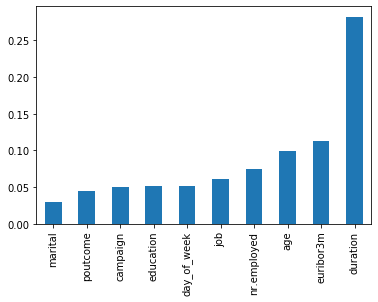

In [32]:
# splitting the data into train and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)
# selecting the data
rfc = RandomForestClassifier(random_state=42)
# fitting the data
rfc.fit(X_train, y_train)
# predicting the data
y_pred = rfc.predict(X_test)
# feature importances
rfc_importances = pd.Series(rfc.feature_importances_, index=X.columns).sort_values().tail(10)
# plotting bar chart according to feature importance
rfc_importances.plot(kind='bar')
plt.show()

In [33]:
# splitting the data
x_train,x_val,y_train,y_val = train_test_split(X,y, test_size=0.3, random_state=42, stratify=y)
# selecting the classifier
rfc = RandomForestClassifier()
# selecting the parameter
param_grid = { 
'max_features': ['auto', 'sqrt', 'log2'],
'max_depth' : [4,5,6,7,8],
'criterion' :['gini', 'entropy']
             }
# using grid search with respective parameters
grid_search_model = GridSearchCV(rfc, param_grid=param_grid)
# fitting the model
grid_search_model.fit(x_train, y_train)
# printing the best parameters
print('Best Parameters are:',grid_search_model.best_params_)

Best Parameters are: {'criterion': 'gini', 'max_depth': 8, 'max_features': 'auto'}


              precision    recall  f1-score   support

           0       0.98      0.87      0.92      8723
           1       0.46      0.86      0.60      1162

    accuracy                           0.87      9885
   macro avg       0.72      0.86      0.76      9885
weighted avg       0.92      0.87      0.88      9885

[[7562 1161]
 [ 162 1000]]


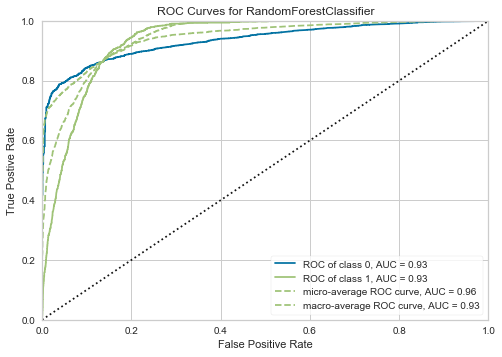

In [38]:
from sklearn.metrics import roc_auc_score,roc_curve,classification_report
from sklearn.model_selection import cross_val_score
from imblearn.over_sampling import SMOTE
from yellowbrick.classifier import roc_auc


# A function to use smote
def grid_search_random_forrest_best(dataframe,target):
    
    # splitting the data
    x_train,x_val,y_train,y_val = train_test_split(dataframe,target, test_size=0.3, random_state=42)
    
    # Applying Smote on train data for dealing with class imbalance
    smote = SMOTE(kind='regular')
    
    X_sm, y_sm =  smote.fit_sample(x_train, y_train)
    
    rfc = RandomForestClassifier(n_estimators=11, max_features='auto', max_depth=8, criterion='entropy',random_state=42)
    
    rfc.fit(X_sm, y_sm)
    y_pred = rfc.predict(x_val)
    print(classification_report(y_val, y_pred))
    print(confusion_matrix(y_val, y_pred))
    visualizer = roc_auc(rfc,X_sm,y_sm,x_val,y_val)


grid_search_random_forrest_best(X,y)

In [ ]:
pip --version

              precision    recall  f1-score   support

           0       0.98      0.87      0.92      8723
           1       0.46      0.87      0.60      1162

    accuracy                           0.87      9885
   macro avg       0.72      0.87      0.76      9885
weighted avg       0.92      0.87      0.88      9885

[[7551 1172]
 [ 155 1007]]


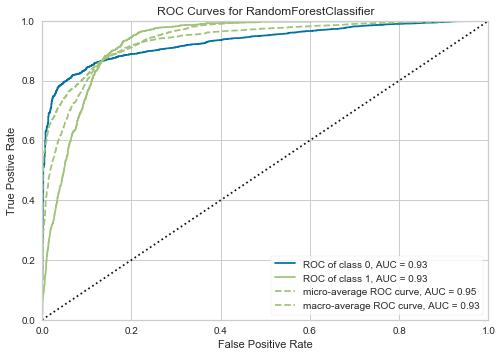

In [39]:


grid_search_random_forrest_best(X[['duration','euribor3m','age','nr.employed','job','day_of_week','campaign','education','emp.var.rate','poutcome']],y)

In [40]:
# splitting the data into train and test set
x_train,x_val,y_train,y_val = train_test_split(X, y, test_size=0.3, random_state=42)
# Initializing smote
smote = SMOTE(kind='regular')
# applying smote
X_sm, y_sm =  smote.fit_sample(x_train, y_train)
# fitting logistic regression
log_reg = LogisticRegression()
# parameter grid
param_grid = { 
        'C' : np.logspace(-5, 8, 15)
            }
# initializing grid search model
grid_search = GridSearchCV(log_reg, param_grid=param_grid)
# Fitting the model 
grid_search.fit(X_sm, y_sm)
# predicting values
y_pred = grid_search.predict(x_val)

              precision    recall  f1-score   support

           0       0.99      0.80      0.89      8723
           1       0.38      0.91      0.54      1162

    accuracy                           0.82      9885
   macro avg       0.68      0.86      0.71      9885
weighted avg       0.91      0.82      0.85      9885

[[7018 1705]
 [ 102 1060]]


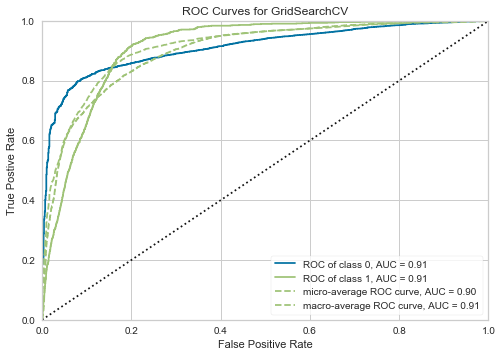

In [41]:
# printing classification report
print(classification_report(y_val, y_pred))
# print confusion matrix
print(confusion_matrix(y_val, y_pred))
# using visualizer
visualizer = roc_auc(grid_search,X_sm,y_sm,x_val,y_val)

In [42]:
# spiltting the data into train and test data
x_train,x_val,y_train,y_val = train_test_split(X, y, test_size=0.3, random_state=42)
# initializing smote
smote = SMOTE(kind='regular')
# applying smote
X_sm, y_sm =  smote.fit_sample(x_train, y_train)
# initializing XGBoost classifier
model = XGBClassifier(n_estimators=50, max_depth=4)
# fitting the model
model.fit(pd.DataFrame(X_sm,columns=x_train.columns), y_sm)
# predicting the model
y_pred = model.predict(x_val)

              precision    recall  f1-score   support

           0       0.94      0.95      0.95      8723
           1       0.60      0.55      0.58      1162

    accuracy                           0.90      9885
   macro avg       0.77      0.75      0.76      9885
weighted avg       0.90      0.90      0.90      9885

[[8298  425]
 [ 519  643]]


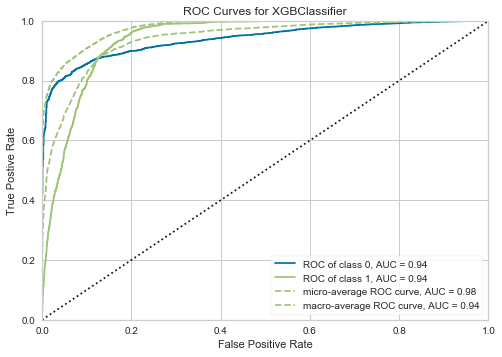

In [43]:
# printing classification report
print(classification_report(y_val, y_pred))
# printing confusion matrix
print(confusion_matrix(y_val, y_pred))
# using visualizer to 
visualizer = roc_auc(model,X_sm,y_sm,x_val,y_val)

In [44]:
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import VotingClassifier


# splitting the data  
x_train,x_val,y_train,y_val = train_test_split(X, y, test_size=0.3, random_state=42)
# using smote
smote = SMOTE(kind='regular')
X_sm, y_sm =  smote.fit_sample(x_train, y_train)
# models to use for ensembling  
model1 = RandomForestClassifier()
model3 = GradientBoostingClassifier()
model2 = LogisticRegression()
# fitting the model
model = VotingClassifier(estimators=[('rf', model1), ('lr', model2), ('xgb',model3)], voting='soft')
model.fit(X_sm,y_sm)
# predicting balues and getting the metrics
y_pred = model.predict(x_val)

              precision    recall  f1-score   support

           0       0.97      0.90      0.93      8723
           1       0.51      0.79      0.62      1162

    accuracy                           0.89      9885
   macro avg       0.74      0.84      0.78      9885
weighted avg       0.92      0.89      0.90      9885

[[7839  884]
 [ 247  915]]


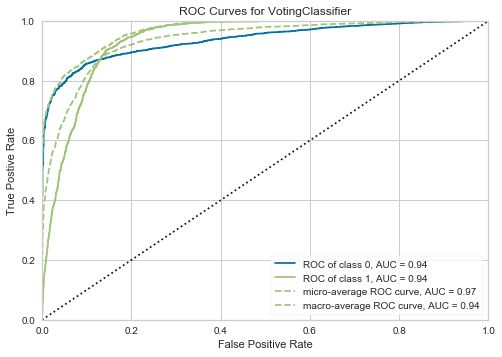

In [45]:
print(classification_report(y_val, y_pred))
print(confusion_matrix(y_val, y_pred))
visualizer = roc_auc(model,X_sm,y_sm,x_val,y_val)

In [48]:
# Actual Test File
test = pd.read_csv('C:/Users/Lenovo/Desktop/test.csv')

# Storing the Id column
Id = test[['Id']]

# Preprocessed Test File
test = pd.read_csv('C:/Users/Lenovo/Desktop/test_preprocessed.csv')
test.drop('Id',1,inplace=True)
test.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
0,32,4,0,6,0,0,0,0,3,3,131,5,1,1.4,93.918,-42.7,4.961,5228.1
1,37,10,3,6,0,0,0,0,4,3,100,1,1,-2.9,92.963,-40.8,1.262,5076.2
2,55,5,0,5,1,2,0,0,3,2,131,2,1,-1.7,94.215,-40.3,0.810,5017.5
3,44,2,1,0,1,0,0,1,4,3,48,2,1,1.4,94.465,-41.8,4.961,5228.1
4,28,0,2,3,0,0,0,0,5,0,144,2,1,-1.8,92.843,-47.1,1.531,5099.1


In [49]:
smote = SMOTE(kind='regular')

X_sm, y_sm =  smote.fit_sample(x_train, y_train)


log_reg = LogisticRegression()

param_grid = { 
            'C' : np.logspace(-5, 8, 15)
             }
grid_search = GridSearchCV(log_reg, param_grid=param_grid)

grid_search.fit(X_sm, y_sm)
    
# Predict on the preprocessed test file
y_pred = grid_search.predict(test)
    
prediction = pd.DataFrame(y_pred,columns=['y'])
submission = pd.concat([Id,prediction['y']],1)

submission.to_csv('C:/Users/Lenovo/Desktop/submission.csv',index=False)